# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# Load Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,roc_curve, classification_report, cohen_kappa_score, confusion_matrix, f1_score, log_loss, roc_auc_score

In [2]:
data = pd.read_excel('GermanCredit.xlsx')
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [3]:
data.info()
# float64(2), int64(1)
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [4]:
data.describe()
# 5 point summary

,Creditability,CreditAmount,DurationOfCreditInMonths
count,1000.000000,1000.00000,1000.000000
mean,0.700000,3271.24800,20.903000
std,0.458487,2822.75176,12.058814
min,0.000000,250.00000,4.000000
25%,0.000000,1365.50000,12.000000
50%,1.000000,2319.50000,18.000000
75%,1.000000,3972.25000,24.000000
max,1.000000,18424.00000,72.000000


# Check how many records do we have


In [5]:
data.shape
# 1000 rows and 3 columns

(1000, 3)

# Plot Histogram for column 'CreditAmount'

<AxesSubplot:ylabel='Frequency'>

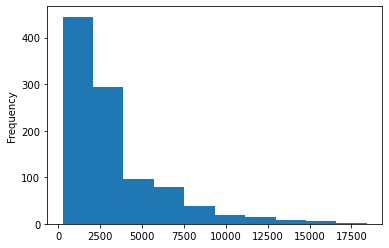

In [6]:
data['CreditAmount'].plot(kind = 'hist')

# Create creditability dataframe

In [7]:
creditability = pd.DataFrame(data['Creditability'], columns = ['Creditability'])
creditability.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


# Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [8]:
creditability.value_counts()

Creditability
1                700
0                300
dtype: int64

# Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='Creditability'>

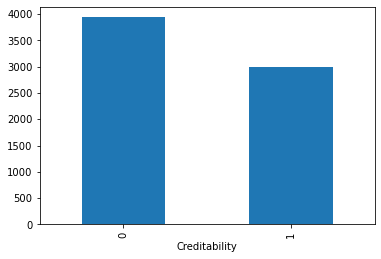

In [9]:
data.groupby(['Creditability']).mean()['CreditAmount'].plot(kind = 'bar')

# Prepare input data for the model

In [10]:
data.isnull().sum()
# no null values

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

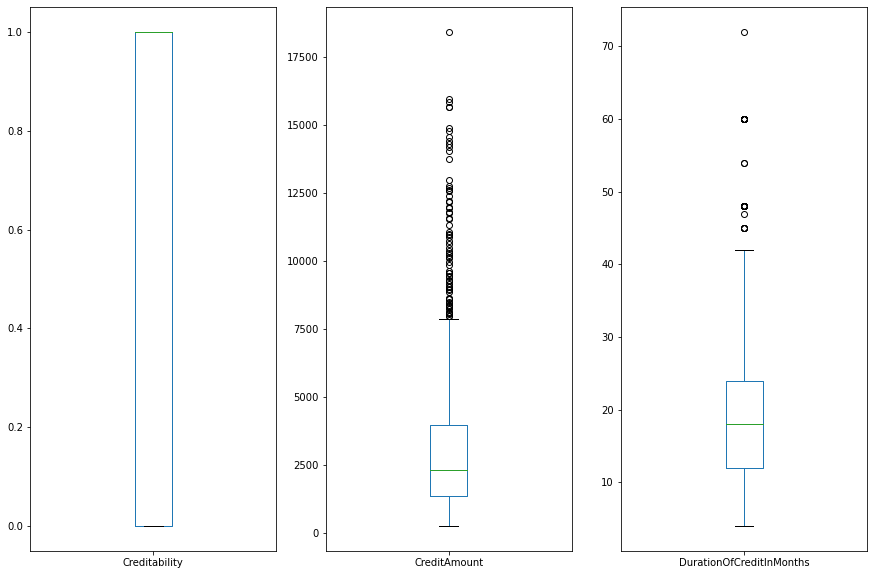

In [11]:
data.plot(kind = 'box', sharex = False, subplots = True, figsize = (15,10), layout = (1,3))
plt.show()
# outliers found

In [12]:
for i in data:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    uc = data[i].quantile(0.99)
    lc = data[i].quantile(0.01)
    for j in data[i].index:
        if data.loc[j, i] > ul:
            data.loc[j, i] = uc
        if data.loc[j, i] < ll:
            data.loc[j, i] = lc

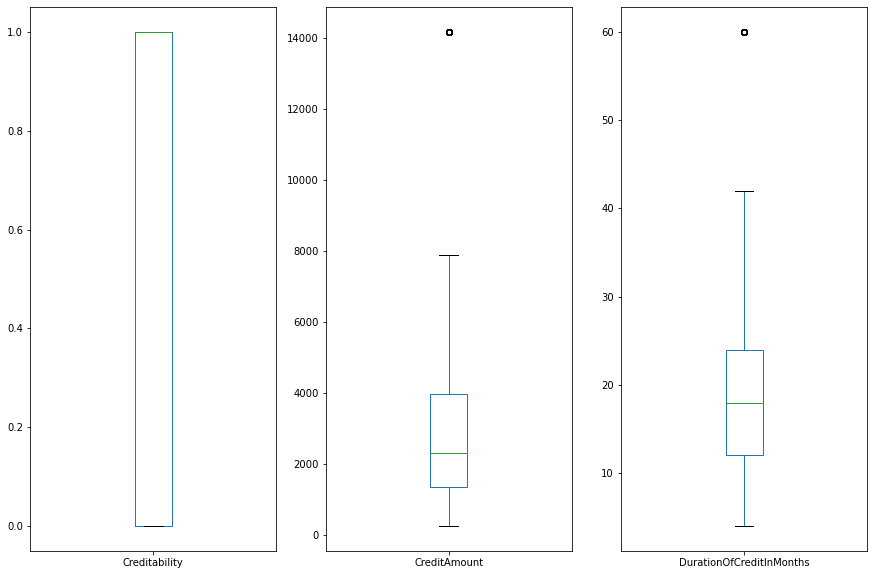

In [13]:
data.plot(kind = 'box', sharex = False, subplots = True, figsize = (15,10), layout = (1,3))
plt.show()
# outliers capped

In [14]:
# scaling
sc = StandardScaler()
for i in data.drop('Creditability', axis = 1):
    data[i] = sc.fit_transform(data[i].values.reshape(-1,1))
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,-0.714514,-0.259924
1,1,-0.205300,-0.915745
2,1,-0.775038,-0.697138
3,1,-0.402293,-0.697138
4,1,-0.388035,-0.697138


In [15]:
x = data.drop('Creditability', axis = 1)
y = data['Creditability']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.3)

# Fit logistic regression model

In [16]:
logreg = LogisticRegression(random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Test accuracy calculation

In [17]:
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

acc = (TP + TN) / (TN + TP + FP + FN)
acc

0.67

In [18]:
accuracy_score(y_test, y_pred)

0.67

# Build a confusion matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[ 10,  90],
       [  9, 191]], dtype=int64)

# Predicted Probability distribution Plots for Defaults and Non Defaults

Optimization terminated successfully.
         Current function value: 0.672058
         Iterations 5


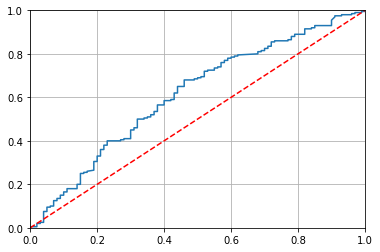

In [20]:
logreg = sm.Logit(y_train, x_train).fit()
y_pred_prob = logreg.predict(x_test)

fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot([0,1], 'r--')
plt.grid(True)